# Paso #1: IMPORTAR LIBRERÍAS

In [1]:
#Añadimos estas dos líneas adicionales para que uséis la misma versión que uso yo en el curso
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

from google.colab.patches import cv2_imshow

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.12.0
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
ERROR: Could not find a version that satisfies the requiremen

ModuleNotFoundError: No module named 'google'

In [1]:
# Importamos los paquetes necesarios
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Definimos variables generales

# Ruta de la data y capertas dentro de esta
dataPath = 'E:/proyecto tfm/tfm-leaves-computer-vision/Fotos TFM'
typeLeavesList = os.listdir(dataPath)

In [ ]:
# Obtenemos información relevante del dataset 
keyfacial_df.info()

In [ ]:
# Comprobamos si hay valores nulos en el dataset 
keyfacial_df.isnull().sum()

In [ ]:
keyfacial_df['Image'].shape

In [ ]:
# Dado que los valores para la imagen se dan como cadenas separadas por espacios, separamos los valores usando ' ' como separador.
# Luego convertimos esto en una matriz numérica usando np.fromstring y convierta la matriz 1D obtenida en una matriz 2D de forma (96, 96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [ ]:
# Obtain the Shape of the image
keyfacial_df['Image'][0].shape

In [ ]:
keyfacial_df.describe()

# Paso #2: VISUALIZACIÓN DE IMÁGENES

Cantidad de imágenes: Enfermas
601
Cantidad de imágenes: Sanas
600


<Axes: >

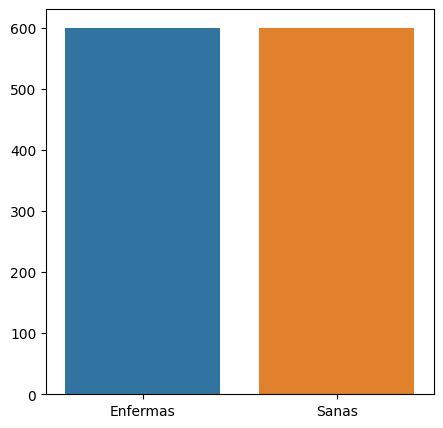

In [3]:
# Cantidad de imagenes por clasificación - Sanas / Enfermas

listCount = []
for nameDir in typeLeavesList:
    leavePath = dataPath + '/' + nameDir
    countFile = len([name for name in os.listdir(leavePath) ])
    print('Cantidad de imágenes:', nameDir)
    print(countFile)
    listCount.append(countFile)

plt.figure(figsize = (5,5))
sns.barplot(x = typeLeavesList, y = listCount )

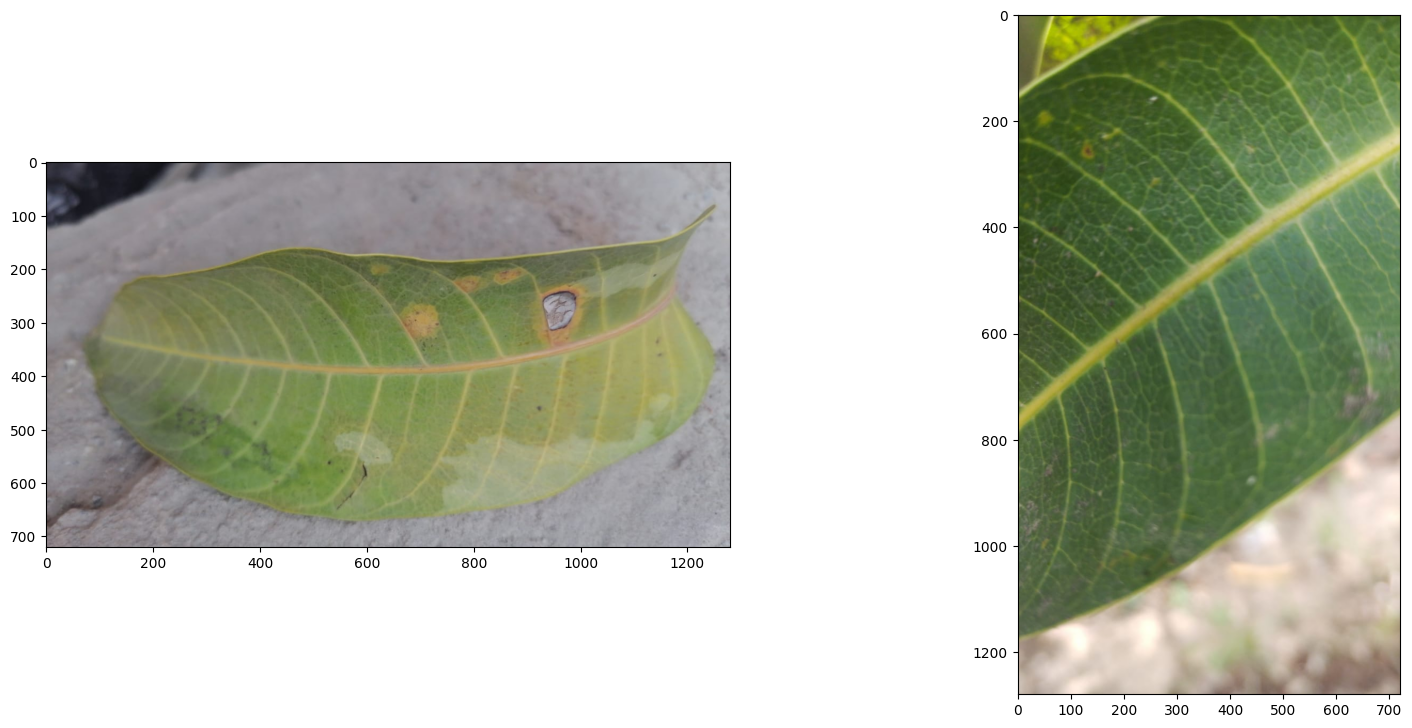

In [4]:
# Representamos una imagen aleatoria del conjunto de datos junto por cada clasificación (Una Sana y una enferma)
# Los datos de la imagen se obtienen directamente de los archivos del los directorios

fig = plt.figure(figsize=(30, 30))

countImg = 0
for nameDir in typeLeavesList:
    leavePath = dataPath + '/' + nameDir

    listLeaves= os.listdir(leavePath)
    countLeave = len([name for name in listLeaves ])
    indexRandom = np.random.randint(1, countLeave)
    
    fileName = listLeaves[indexRandom]
    ax = fig.add_subplot(3, 3, countImg + 1)    

    image = cv2.imread(leavePath+'/'+fileName)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    countImg += 1


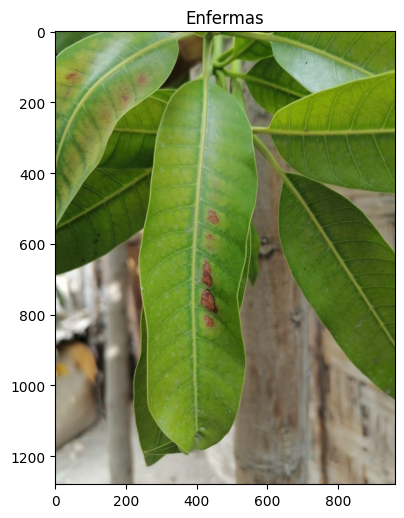

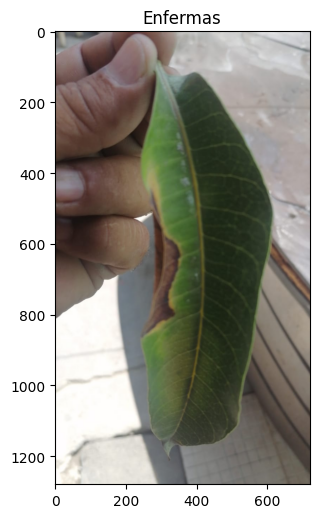

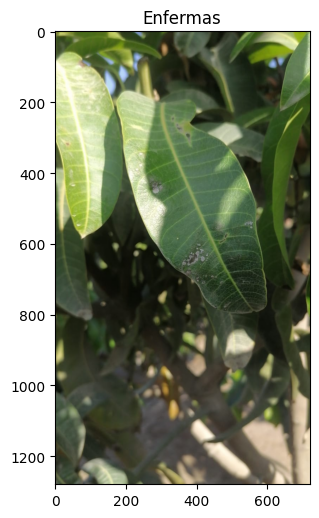

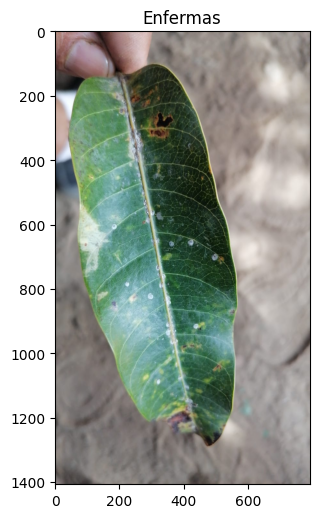

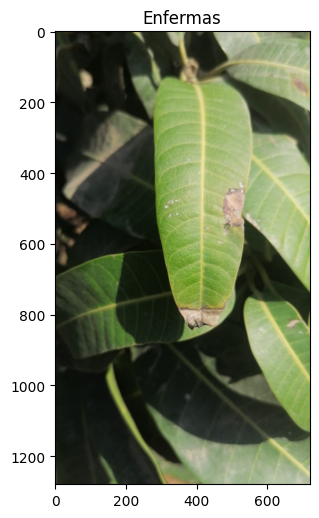

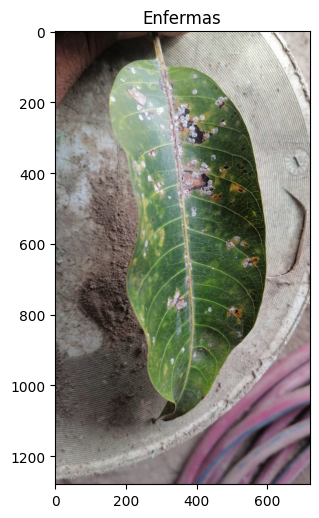

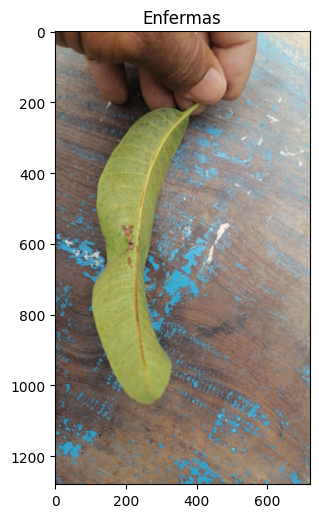

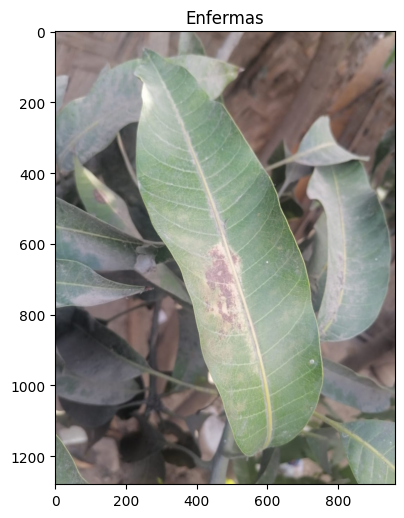

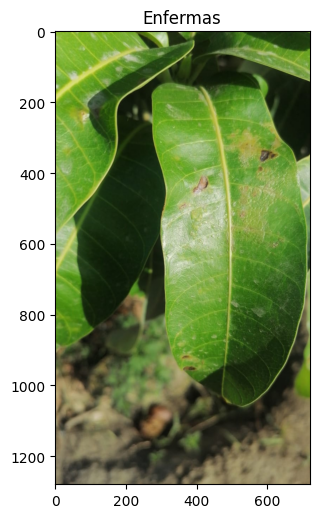

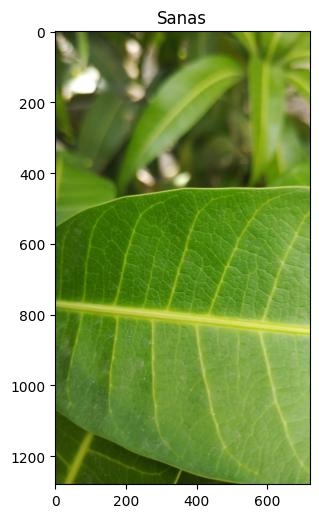

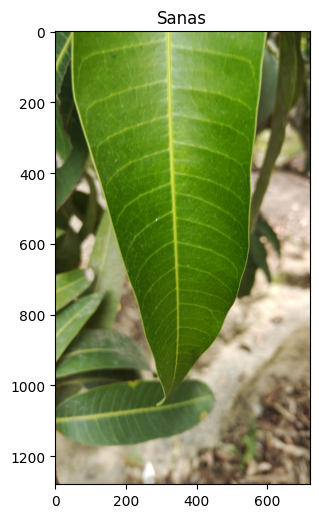

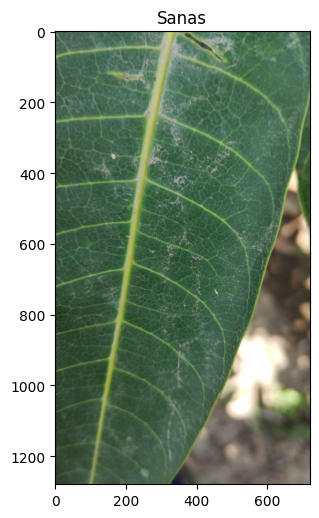

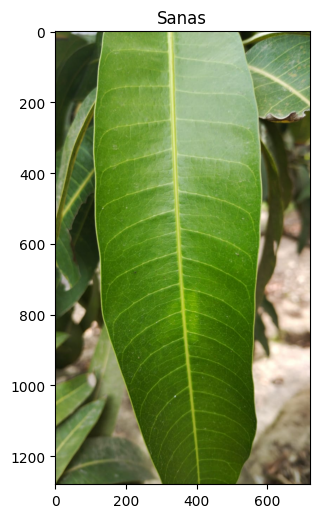

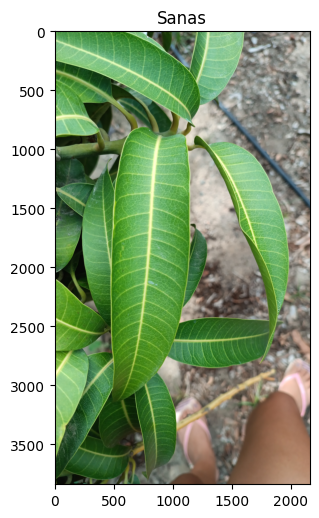

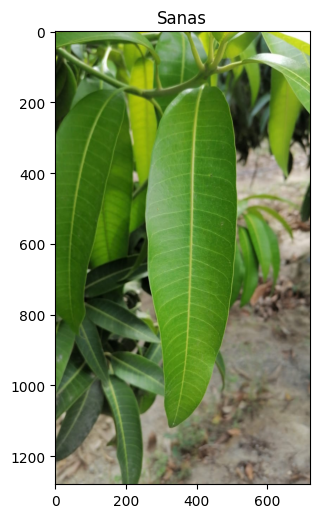

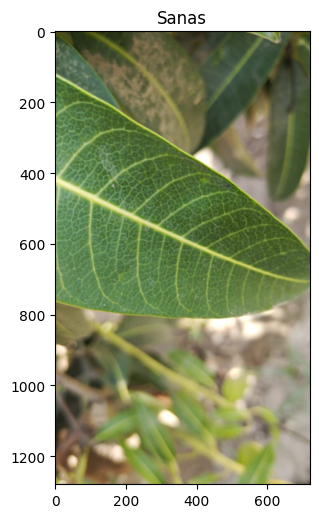

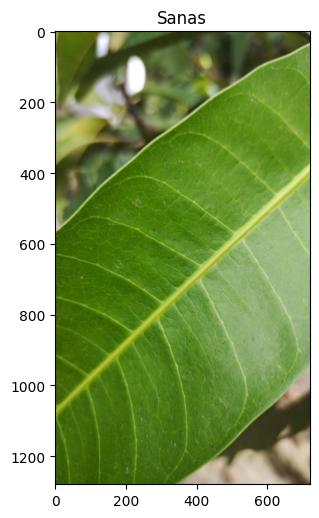

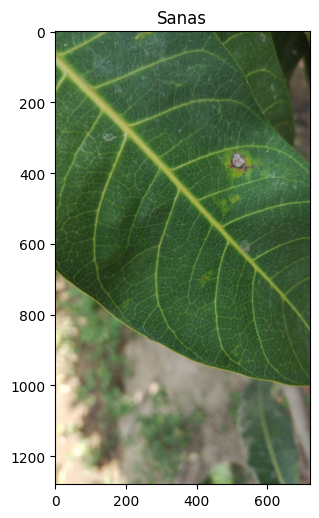

In [5]:
# Veamos más imágenes en formato matricial

for nameDir in typeLeavesList:
    leavePath = dataPath + '/' + nameDir
    listLeaves= os.listdir(leavePath)
    countLeave = len([name for name in listLeaves ])

    for i in range(9):
        fig = plt.figure(figsize=(20, 20))

        indexRandom = np.random.randint(1, countLeave)
        fileName = listLeaves[indexRandom]
        ax = fig.add_subplot(3, 3, i + 1)    

        image = cv2.imread(leavePath+'/'+fileName)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.title(nameDir)
        plt.imshow(image)

# Paso #3: PREPROCESADOR DE LAS IMÁGENES

In [34]:
# Funcion para redimencionar la imagen  a (512, 512)

def resize(x):
  
#   img = x.reshape(48, 48)
  return cv2.resize(x, dsize=(512, 512), interpolation = cv2.INTER_AREA)

In [36]:

labels = []
leavesData = []
label = 0

for dirName in typeLeavesList:
    leavePath = dataPath + '/' + dirName
    print('Leyendo las imágenes: ',dirName)
    for fileName in os.listdir(leavePath):
        labels.append(label)
        img = resize(cv2.imread(leavePath+'/'+fileName,0))
        leavesData.append(img)
    label = label + 1

# cv2.destroyAllWindows()
print('labels= ',labels)
print('Número de etiquetas 0: ',np.count_nonzero(np.array(labels)==0))
print('Número de etiquetas 1: ',np.count_nonzero(np.array(labels)==1))

Leyendo las imágenes:  Enfermas
Leyendo las imágenes:  Sanas
labels=  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
# Dividir el dataframe en características y etiquetas para la clasificación
from keras.utils import to_categorical

X = np.array(leavesData)
y = to_categorical(labels)

# Visualizamos los pixeles de las imagenes
X[0]

array([[109, 111, 116, ...,  84,  83,  83],
       [106, 106, 109, ...,  84,  83,  83],
       [108, 107, 106, ...,  81,  79,  79],
       ...,
       [161, 161, 161, ..., 168, 169, 170],
       [160, 159, 158, ..., 169, 169, 169],
       [158, 157, 156, ..., 169, 169, 168]], dtype=uint8)

In [9]:
# Visualizamos las etiquetas
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [10]:
# 
X.shape

(1201, 512, 512)

In [38]:
X = np.stack(X, axis = 0)
X = X.reshape(1201, 512, 512, 1)

print(X.shape, y.shape)

(1201, 512, 512, 1) (1201, 2)


In [39]:
# Dividir el dataframe en conjunto de entrenamiento, test y validación 

from sklearn.model_selection import train_test_split

# Obtenemos el conjunto de entrenamiento y el conjunto de Test
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.4, shuffle = True)

# Del conjunto de Test, obtenemos una parte para el conjunto de validaciòn, el 50% del conjunto de Test
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)

In [40]:
print("Conjunto de validación")
print(X_val.shape, y_val.shape)
print("Conjunto de Test")
print(X_Test.shape, y_Test.shape)
print("Conjunto de Entrenamiento")
print(X_train.shape, y_train.shape)

Conjunto de validación
(240, 512, 512, 1) (240, 2)
Conjunto de Test
(241, 512, 512, 1) (241, 2)
Conjunto de Entrenamiento
(720, 512, 512, 1) (720, 2)


# Paso #4: NORMALIZACIÓN DE LOS DATOS Y PREPARACIÓN PARA EL ENTRENAMIENTO

In [41]:
# Pre Procesado de Imágenes 

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

X_train

array([[[[0.50196078],
         [0.49411765],
         [0.48627451],
         ...,
         [0.50588235],
         [0.49411765],
         [0.49019608]],

        [[0.50980392],
         [0.50588235],
         [0.49803922],
         ...,
         [0.56470588],
         [0.50980392],
         [0.50588235]],

        [[0.50588235],
         [0.50588235],
         [0.50196078],
         ...,
         [0.73333333],
         [0.70980392],
         [0.63921569]],

        ...,

        [[0.58823529],
         [0.58039216],
         [0.56862745],
         ...,
         [0.6       ],
         [0.61176471],
         [0.62745098]],

        [[0.60392157],
         [0.59215686],
         [0.58039216],
         ...,
         [0.61960784],
         [0.63137255],
         [0.63921569]],

        [[0.62352941],
         [0.61176471],
         [0.60392157],
         ...,
         [0.63529412],
         [0.63921569],
         [0.64313725]]],


       [[[0.48235294],
         [0.52156863],
         [0.52

# Paso #3: AUMENTACIÓN DE LAS IMÁGENES

In [42]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.35],
    fill_mode = "nearest")


# TAREA #6: CONSTRUIR UN MODELO DE DEEP LEARNING(CNN) DE RESTNET(RED RESIDUAL)

In [43]:
# Se define a nivel de código, el bloque de capa red residual (RESTNET) 
# Lo usaremos luego en a la arquitectura principal del modelo

def res_block(X, filter, stage):

  # Bloque Convolucional
  X_copy = X

  f1 , f2, f3 = filter

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Camino Corto
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X


  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [44]:
# Arquietectura principal para CNN con RestNet

# Debo usar pixeles mas grandes como 512 x 512
input_shape = (512, 512, 1)

# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - Fase
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - Fase
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - Fase
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(2, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_clasification_leaves = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_clasification_leaves.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 1,221,634
Trainable params: 1,213,058
Non-trainable params: 8,576
__________________________________________________________________________________________________


In [45]:
# Entrenar la red 
model_clasification_leaves.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# categorical_crossentropy


In [48]:
# Usamos la parada temprana para salir del entenamiento si el error de validación
# no decrece después de cierto número de epochs (paciencia) 
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

# Guardamos el mejor modelo con menor error de validación
checkpointer = ModelCheckpoint(
    filepath = "Leaves_Clasification_weights.hdf5", 
    verbose = 1, 
    save_best_only=True, 
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max')

In [49]:
print("Conjunto de Entrenamiento")
print(X_train.shape, y_train.shape)

Conjunto de Entrenamiento
(720, 512, 512, 1) (720, 2)


In [50]:
history = model_clasification_leaves.fit(train_datagen.flow(X_train, y_train, batch_size=128),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 128,
	epochs= 60, callbacks=[checkpointer, earlystopping])

Epoch 1/60
5/5 [==============================] - 1799s 429s/step - loss: 0.6965 - accuracy: 0.5172 - val_loss: 15.7475 - val_accuracy: 0.4625

Epoch 1: val_accuracy improved from -inf to 0.46250, saving model to Leaves_Clasification_weights.hdf5
Epoch 2/60
5/5 [==============================] - 2228s 552s/step - loss: 0.6102 - accuracy: 0.5980 - val_loss: 227.2039 - val_accuracy: 0.4625

Epoch 2: val_accuracy did not improve from 0.46250
Epoch 3/60
5/5 [==============================] - 1893s 351s/step - loss: 0.6251 - accuracy: 0.6824 - val_loss: 642.8100 - val_accuracy: 0.4625

Epoch 3: val_accuracy did not improve from 0.46250
Epoch 4/60
5/5 [==============================] - 1502s 304s/step - loss: 0.6013 - accuracy: 0.6368 - val_loss: 56.7140 - val_accuracy: 0.4625

Epoch 4: val_accuracy did not improve from 0.46250
Epoch 5/60
5/5 [==============================] - ETA: 0s - loss: 0.6113 - accuracy: 0.6503  

In [91]:
# Guardar la arquitectura del modelo en un JSON para su futuro uso 

model_json = model_clasification_leaves.to_json()
with open("Leaves_Clasification_model.json","w") as json_file:
  json_file.write(model_json)

KeyError: 'input_5_ib-0'

# Paso #16: EVALUAR LA EFICACIA DEL MODELO CLASIFICACIÓN

In [ ]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Cargamos la arquitectura del modelo
model_clasification_leaves = tf.keras.models.model_from_json(json_savedModel)
model_clasification_leaves.load_weights('Leaves_Clasification_weights.hdf5')
model_clasification_leaves.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_clasification_leaves.evaluate(X_Test, y_Test)
print('Accuracy en la fase de Test: {}'.format(score[1]))

In [ ]:
history.history.keys()

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Accuracy en el Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy en la Validación')
plt.title('ACCURACY')
plt.legend()

In [ ]:
plt.plot(epochs, loss, 'ro', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('LOSS')
plt.legend()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

In [ ]:
y_true.shape

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

# Paso #16: EVALUAR EL MODELO DE CLASIFICACIÓN (MATRIZ DE CONFUSIÓN, ACIERTO, PRECISIÓN Y RECUPERACIÓN)